In [1]:
import numpy as np

import matplotlib.pyplot as plt

from osgeo import osr, gdal

import matplotlib as mpl

In [2]:
fn = 'Data/N03W077.SRTMGL1.hgt/N03W077.hgt'
fn = 'Data/rasters_SRTMGL3/output_SRTMGL3.tif'

In [3]:
ds = gdal.OpenEx(fn)
gt = ds.GetGeoTransform()
nodata = ds.GetRasterBand(1).GetNoDataValue()
data = ds.ReadAsArray()
ds = None

#data = np.ma.masked_values(data, nodata)

ys, xs = data.shape
ulx, xres, _, uly, _, yres = gt
extent = [ulx, ulx+xres*xs, uly, uly+yres*ys]

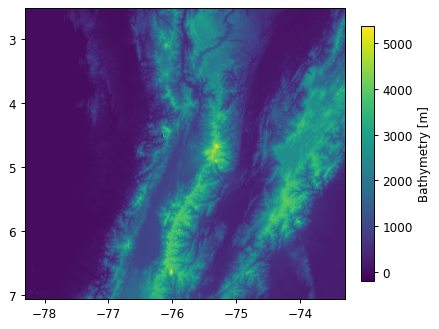

In [4]:
fig, ax = plt.subplots(figsize=(5,6), constrained_layout=True, facecolor='w', dpi=86)

cmap = mpl.cm.get_cmap("viridis").copy() # cmap = plt.cm.viridis
cmap.set_bad('#dddddd')

im = ax.imshow(data, extent=extent, cmap=cmap)
cb = fig.colorbar(im, shrink=.5)
cb.set_label('Bathymetry [m]')

In [5]:
xv, yv = np.meshgrid(np.arange(xs), np.arange(ys))
LonX, LatY = [ulx+xres*xv, uly+yres*yv]

In [6]:
import pyvista as pv

In [7]:
grid = pv.StructuredGrid(LonX, LatY, np.ones(np.shape(LonX)))

In [8]:
np.shape(LonX), np.shape(data)

((5464, 6012), (5464, 6012))

In [9]:
grid["height_scaled"] = data.T.ravel()*5e-5

In [10]:
gridWarped = grid.warp_by_scalar("height_scaled")
gridWarped

StructuredGrid (0x14a0d82fb640)
  N Cells:      32838093
  N Points:     32849568
  X Bounds:     -7.831e+01, -7.330e+01
  Y Bounds:     2.505e+00, 7.058e+00
  Z Bounds:     9.905e-01, 1.269e+00
  Dimensions:   5464, 6012, 1
  N Arrays:     1

In [11]:
gridWarped.point_data.remove("height_scaled")


/home/nico/.conda/envs/sx/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


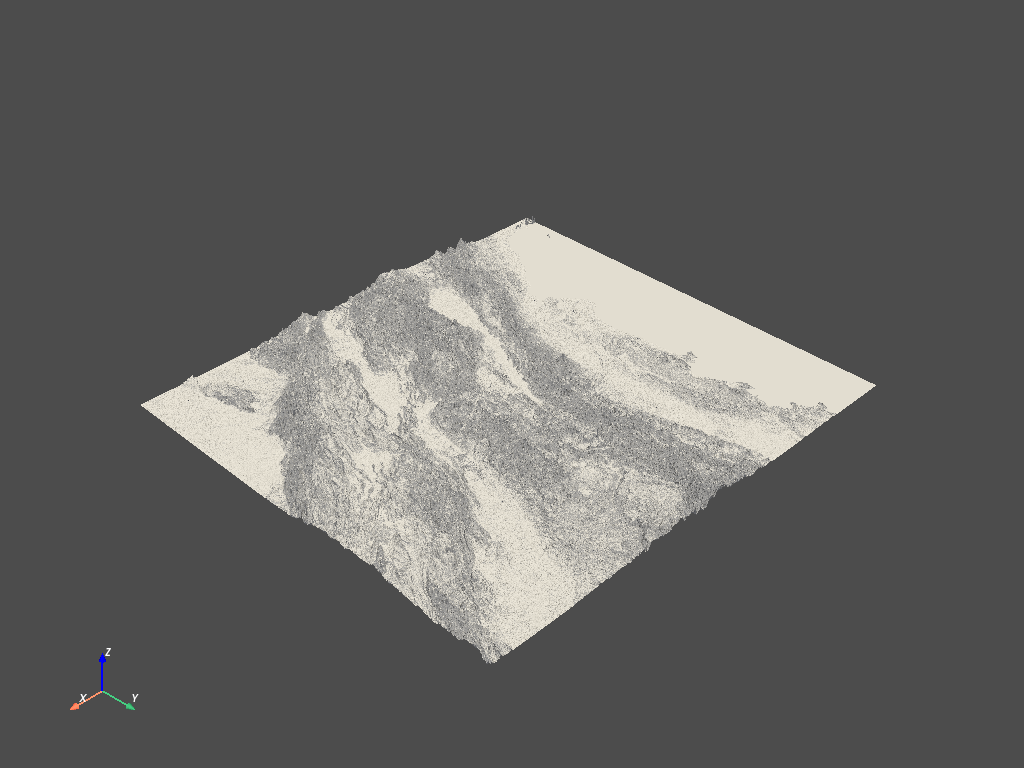

In [12]:
gridWarped.plot()

In [13]:
gridWarped.save("Output/N03W077.vts")

In [14]:
gridWarped

StructuredGrid,Information
N Cells,32838093
N Points,32849568
X Bounds,"-7.831e+01, -7.330e+01"
Y Bounds,"2.505e+00, 7.058e+00"
Z Bounds,"9.905e-01, 1.269e+00"
Dimensions,"5464, 6012, 1"
N Arrays,0
